In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from scipy.stats import lognorm
from scipy import stats

#zbch - Закон больщих чисел 
#cpt - Центрального предела теорема  


In [2]:
np.random.randint(1,7, size=10)

array([3, 2, 6, 5, 2, 3, 1, 3, 3, 3])

In [3]:
dice = pd.Series([1,2,3,4,5,6])


In [4]:
dice.mean()

3.5

In [5]:
dice.sample(10, replace=True)

1    2
4    5
0    1
1    2
3    4
2    3
3    4
2    3
5    6
4    5
dtype: int64

In [6]:
result = [dice.sample(n, replace=True).mean() for n in range (1,1000)]

In [7]:
result[:10]

[5.0,
 5.5,
 3.0,
 4.25,
 3.8,
 3.1666666666666665,
 2.0,
 3.625,
 3.6666666666666665,
 3.4]

<Axes: >

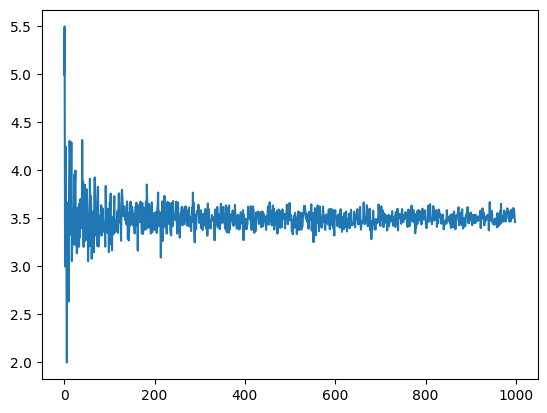

In [8]:
pd.Series(result).plot()

Нормальное распределение

<Axes: xlabel='sample_size'>

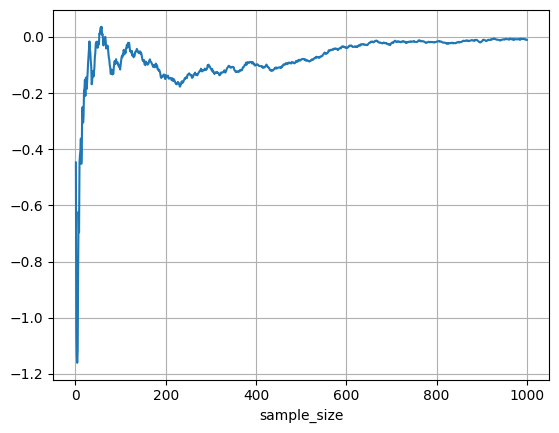

In [9]:
# t = dice.sample(1000, replace=True).to_frame().reset_index(drop=True)
t = pd.DataFrame(np.random.normal(size=1000))
t['cum'] = t[0].cumsum()
t['sample_size'] = range(1, 1001)
t["mean"] = t["cum"] / t["sample_size"]
t.set_index('sample_size')["mean"].plot(grid=True)

<Axes: >

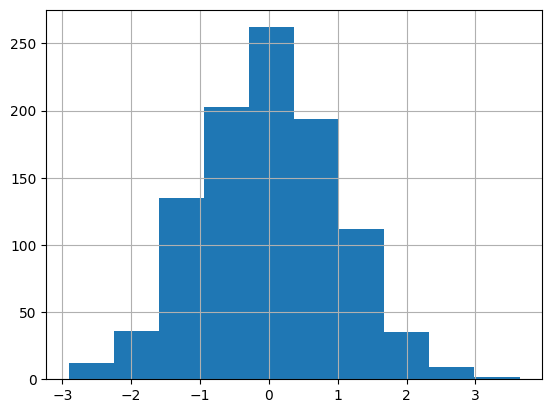

In [10]:
t[0].hist()

Равномерное распределение

<Axes: xlabel='sample_size'>

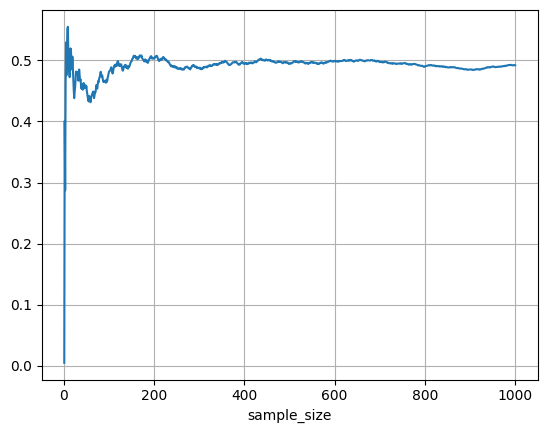

In [11]:
t = pd.DataFrame(np.random.uniform(size=1000))
t['cum'] = t[0].cumsum()
t['sample_size'] = range(1, 1001)
t["mean"] = t["cum"] / t["sample_size"]
t.set_index('sample_size')["mean"].plot(grid=True)

<Axes: >

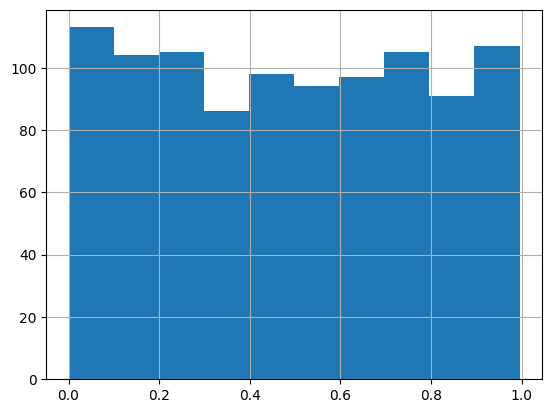

In [12]:
t[0].hist()

Логнормальное распределение

<Axes: ylabel='Count'>

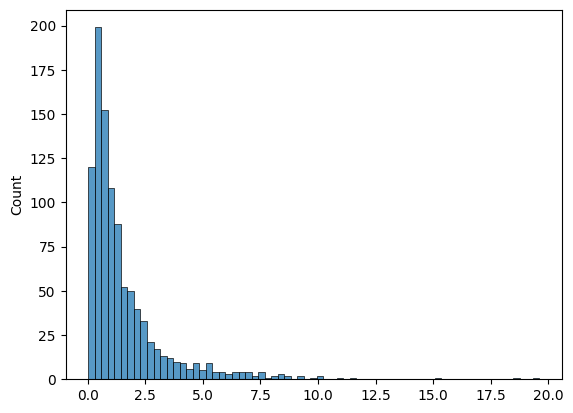

In [13]:
sns.histplot(np.random.lognormal(size=1000))

In [14]:
s = 0.954
mean, var, skew,kurt = lognorm.stats(s, moments = "mvsk")

In [15]:
mean

1.576264803741382

In [21]:





n = 15 #наблюдений в выборке
tt = -2 # t-значение

pval = stats.t.sf(tt, n-1)*2  # two-sided pvalue = Prob(abs(t)>tt)
print(stats.t.sf(np.abs(tt), n-1))
print(pval)
print('t-statistic = %6.3f pvalue = %6.4f' % (tt, pval))
print('t-statistic = %s pvalue = %s' % (tt, pval))

0.03264397644455599
1.934712047110888
t-statistic = -2.000 pvalue = 1.9347
t-statistic = -2 pvalue = 1.934712047110888


In [1]:
from scipy.stats import t, norm
import matplotlib.pyplot as plt
import numpy as np

#Задача 4
n_men = 100
n_women = 100
x_men = 45
x_women = 34
sd_men = 9
sd_women = 10

df = n_men + n_women - 2
sd = np.sqrt(sd_men**2/(n_men) + sd_women**2/(n_women))

t_bound = (x_men - x_women) / sd
res = 2 * t.cdf(x = - t_bound, df = df)
if res < 0.05:
    print('Нулевая гипотеза неверна. Отклоняем ее')
else:
    print('Нулевую гипотезу отклонить нельзя')

Нулевая гипотеза неверна. Отклоняем ее
